In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv(r"C:\Users\barath\Downloads\LoansTrainingSetV2 (1).csv")

C:\Users\barath\AppData\Local\Temp\ipykernel_37780\4266169350.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r"C:\Users\barath\Downloads\LoansTrainingSetV2 (1).csv")


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:

df.shape

(111107, 19)

In [5]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
91997,2227455d-2001-4bf2-946e-130214ea8b7d,30b36e39-0062-4e31-a98e-d8a5a8a4135e,Loan Given,8901,Short Term,690.0,2 years,Own Home,24793.0,Debt Consolidation,454.53,12.8,71.0,7,0,2886,4065,0.0,0.0
66895,36f06da9-6097-4778-8f31-e247c299c4f6,b31ee126-4aba-4e23-8ec9-72358239fb8e,Loan Refused,21149,Long Term,700.0,10+ years,Home Mortgage,85604.0,Home Improvements,1740.6,16.4,26.0,14,0,11573,20338,0.0,0.0
10438,7533d5fa-ec95-4a6b-87f1-89d10d714f9d,22b8da36-fc5b-4dbb-8077-abb7e8e6b379,Loan Given,99999999,Short Term,733.0,1 year,Home Mortgage,75660.0,Debt Consolidation,1298.83,25.0,27.0,18,0,19001,34928,0.0,0.0
14655,d6630902-575e-484d-aba0-0f7a6f3d6a0a,a925fda4-8ae2-4117-b92d-0a8123513e2e,Loan Given,99999999,Long Term,713.0,< 1 year,Home Mortgage,216876.0,Debt Consolidation,2945.9,17.4,23.0,12,0,107822,113976,0.0,0.0
49611,b1992c48-433a-46d9-873b-50ecbb8dec16,e240e604-5084-47c0-869c-ceff9094f4c0,Loan Refused,17231,Short Term,717.0,5 years,Rent,55583.0,Debt Consolidation,1107.03,18.0,NaN,12,0,8742,15256,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [7]:
percentiles = [0.01, 0.25, 0.50, 0.75,0.95, 0.99]
summary = df.describe(percentiles=percentiles)
summary

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
1%,1.710060e+03,623.000000,1.821600e+04,6.400000,1.000000,3.000000,0.000000,1.460600e+02,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
95%,1.000000e+08,6690.000000,1.477950e+05,31.700000,75.000000,20.000000,1.000000,4.001470e+04,1.00000,0.000000
99%,1.000000e+08,7380.000000,2.414160e+05,40.200000,81.000000,27.000000,2.000000,8.159420e+04,1.00000,1.000000


In [8]:
df['Loan Status'].value_counts()

Loan Given      85934
Loan Refused    25173
Name: Loan Status, dtype: int64

In [9]:
df['Term'].value_counts()

Short Term    80274
Long Term     30833
Name: Term, dtype: int64

In [10]:
df['Years in current job'].value_counts()

10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: Years in current job, dtype: int64

In [11]:
df['Home Ownership'].value_counts()

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64

In [12]:
df['Purpose'].value_counts()

Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: Purpose, dtype: int64

In [13]:
df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

In [14]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [15]:


# Replace the invalid value with NaN
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', np.nan)

# Convert 'Maximum Open Credit' column to integers (NaN values will remain as NaN)
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float).astype(pd.Int64Dtype())

In [16]:
df.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [17]:
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Years in current job'] = label_encoder.fit_transform(df['Years in current job'])


In [18]:
df[df['Maximum Open Credit'].isna()]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4930,Loan Refused,2052,Short Term,7030.0,1,Rent,95105.0,Debt Consolidation,1910.02,22.4,37.0,9,0,0,<NA>,0.0,0.0
37357,Loan Refused,1470,Short Term,NaN,2,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,<NA>,0.0,0.0


In [19]:
df.drop([4930,37357],axis=0,inplace=True)

In [20]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21337
Years in current job                0
Home Ownership                      0
Annual Income                   21337
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [21]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.strip()

C:\Users\barath\AppData\Local\Temp\ipykernel_37780\344815907.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.strip()


In [22]:
df.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job              int32
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               Int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [23]:
data_types = {
    'Loan Status': 'category',
    'Term': 'category',
    'Years in current job': 'int64',
    'Home Ownership': 'category',
    'Monthly Debt': 'float64',
    'Maximum Open Credit': 'int64'
}

# Apply data types to DataFrame columns
df = df.astype(data_types)

# Print the data types of the DataFrame columns
print(df.dtypes)

Loan Status                     category
Current Loan Amount                int64
Term                            category
Credit Score                     float64
Years in current job               int64
Home Ownership                  category
Annual Income                    float64
Purpose                           object
Monthly Debt                     float64
Years of Credit History          float64
Months since last delinquent     float64
Number of Open Accounts            int64
Number of Credit Problems          int64
Current Credit Balance             int64
Maximum Open Credit                int64
Bankruptcies                     float64
Tax Liens                        float64
dtype: object


In [24]:
columns_to_impute = ['Credit Score', 'Annual Income','Years in current job','Monthly Debt', 'Months since last delinquent', 'Bankruptcies', 'Tax Liens']

for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    print(f"Imputed missing values in column '{column}' with mean value: {mean_value}")


Imputed missing values in column 'Credit Score' with mean value: 1075.728700650566
Imputed missing values in column 'Annual Income' with mean value: 72485.74621245878
Imputed missing values in column 'Years in current job' with mean value: 4.056802124116826
Imputed missing values in column 'Monthly Debt' with mean value: 962.3991317484055
Imputed missing values in column 'Months since last delinquent' with mean value: 34.90240297877241
Imputed missing values in column 'Bankruptcies' with mean value: 0.1176619136520649
Imputed missing values in column 'Tax Liens' with mean value: 0.02935352044214809


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\barath\AppData\Local\Temp\ipykernel_37780\1428601143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit Score'],color="green")


<Axes: xlabel='Credit Score', ylabel='Density'>

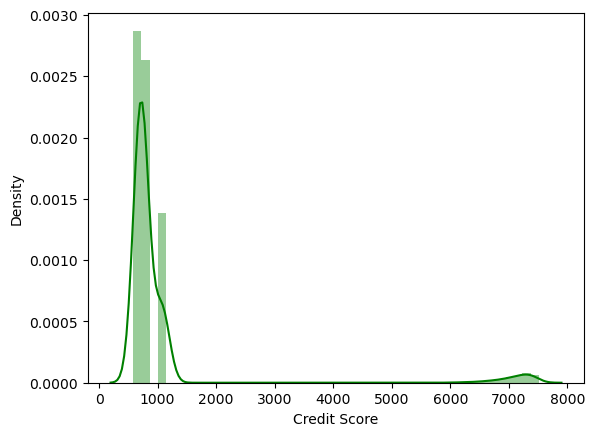

In [26]:
sns.distplot(df['Credit Score'],color="green")


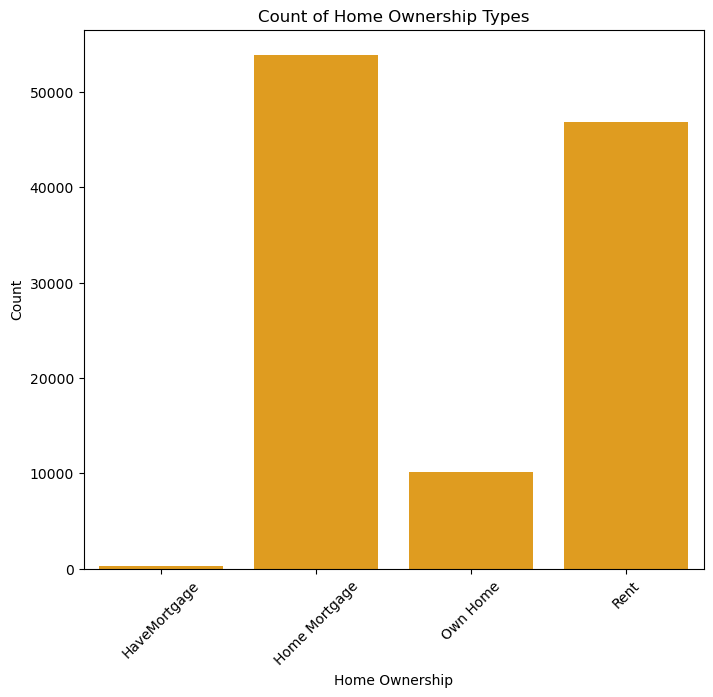

In [27]:



import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
# df = ...

plt.figure(figsize=(8, 7))

# Specify the color of the bars using the 'color' parameter
sns.countplot(x='Home Ownership', data=df, color='orange')  # Change 'skyblue' to your desired color
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Count of Home Ownership Types')
plt.xticks(rotation=45)

plt.show()


C:\Users\barath\AppData\Local\Temp\ipykernel_37780\2562786519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


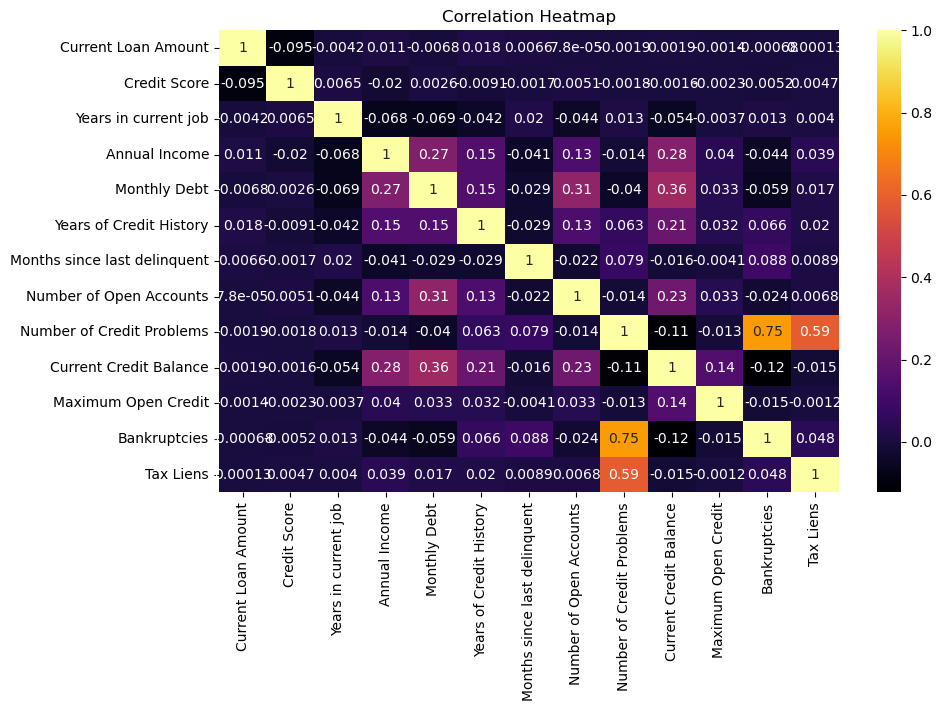

In [28]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

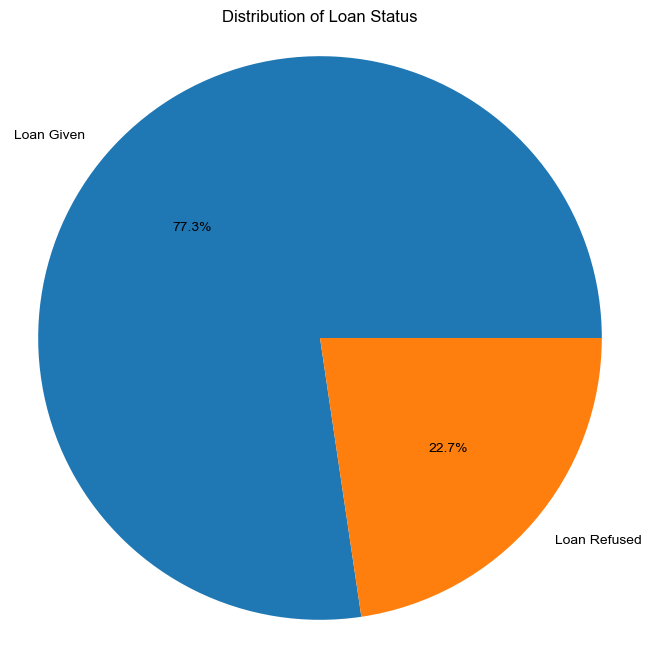

In [29]:
type_counts = df['Loan Status'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Optionally, add Seaborn styling
sns.set()
sns.set_palette("Set2")

plt.show()

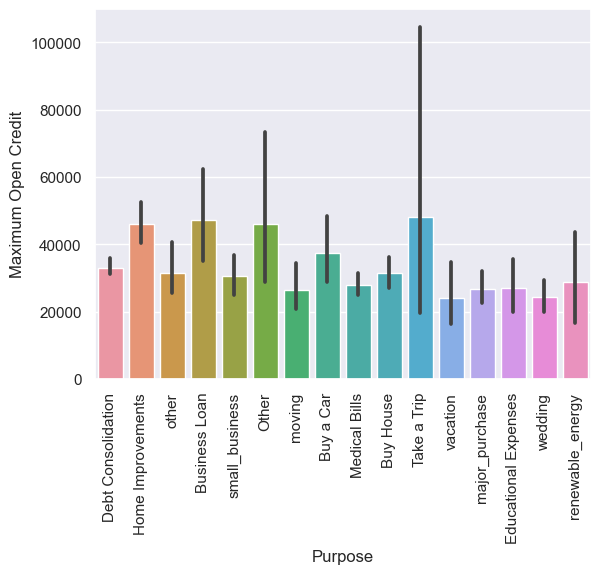

In [30]:
sns.barplot(x=df['Purpose'],y=df['Maximum Open Credit'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
percentiles = [0.01, 0.25, 0.50, 0.75,0.95, 0.99,1.0]
summary = df.describe(percentiles=percentiles)
summary

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.111050e+05,111105.000000,111105.000000,1.111050e+05,111105.000000,111105.000000,111105.000000,111105.000000,111105.000000,1.111050e+05,1.111050e+05,111105.000000,111105.000000
mean,1.147739e+07,1075.728701,4.056802,7.248575e+04,962.399132,18.200991,34.902403,11.125197,0.168030,1.548342e+04,3.438644e+04,0.117662,0.029354
std,3.185533e+07,1324.931044,3.433888,5.027449e+04,485.991691,7.014542,15.045603,5.010249,0.484216,1.982122e+04,3.643027e+05,0.351062,0.260564
min,4.910000e+02,585.000000,0.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1%,1.711000e+03,627.000000,0.000000,1.934064e+04,95.671200,6.400000,3.000000,3.000000,0.000000,1.470000e+02,1.204040e+03,0.000000,0.000000
25%,8.162000e+03,711.000000,1.000000,4.901000e+04,748.180000,13.500000,34.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.000000,0.000000
50%,1.418300e+04,733.000000,3.000000,7.214400e+04,962.399132,16.900000,34.902403,10.000000,0.000000,1.102700e+04,2.124300e+04,0.000000,0.000000
75%,2.382200e+04,750.000000,7.000000,7.961600e+04,962.399132,21.700000,34.902403,14.000000,0.000000,1.933800e+04,3.558400e+04,0.000000,0.000000
95%,1.000000e+08,1075.728701,10.000000,1.386406e+05,1829.866000,31.700000,68.000000,20.000000,1.000000,4.001480e+04,7.453840e+04,1.000000,0.000000
99%,1.000000e+08,7360.000000,11.000000,2.242350e+05,2751.824400,40.200000,79.000000,27.000000,2.000000,8.159780e+04,1.646209e+05,1.000000,1.000000


In [32]:
import pandas as pd

bfill_values=df[['Annual Income','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Maximum Open Credit']]

# Backward fill missing values
bfill_values = bfill_values.fillna(method='bfill')

In [33]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Loan Refused,12232,Short Term,7280.0,10,Rent,46643.0,Debt Consolidation,777.39,18.0,10.000000,12,0,6762,7946,0.0,0.0
1,Loan Refused,25014,Long Term,7330.0,1,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,34.902403,14,0,35706,77961,0.0,0.0
2,Loan Refused,16117,Short Term,7240.0,9,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.000000,11,1,11275,14815,1.0,0.0
3,Loan Refused,11716,Short Term,7400.0,3,Rent,34171.0,Debt Consolidation,990.94,10.0,34.902403,21,0,7009,43533,0.0,0.0
4,Loan Refused,9789,Long Term,6860.0,1,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.000000,13,1,16913,19553,1.0,0.0


In [34]:
percentiles = [0.01, 0.25, 0.50, 0.75,0.95, 0.99,1.0]
summary = df.describe(percentiles=percentiles)
summary

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.111050e+05,111105.000000,111105.000000,1.111050e+05,111105.000000,111105.000000,111105.000000,111105.000000,111105.000000,1.111050e+05,1.111050e+05,111105.000000,111105.000000
mean,1.147739e+07,1075.728701,4.056802,7.248575e+04,962.399132,18.200991,34.902403,11.125197,0.168030,1.548342e+04,3.438644e+04,0.117662,0.029354
std,3.185533e+07,1324.931044,3.433888,5.027449e+04,485.991691,7.014542,15.045603,5.010249,0.484216,1.982122e+04,3.643027e+05,0.351062,0.260564
min,4.910000e+02,585.000000,0.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1%,1.711000e+03,627.000000,0.000000,1.934064e+04,95.671200,6.400000,3.000000,3.000000,0.000000,1.470000e+02,1.204040e+03,0.000000,0.000000
25%,8.162000e+03,711.000000,1.000000,4.901000e+04,748.180000,13.500000,34.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.000000,0.000000
50%,1.418300e+04,733.000000,3.000000,7.214400e+04,962.399132,16.900000,34.902403,10.000000,0.000000,1.102700e+04,2.124300e+04,0.000000,0.000000
75%,2.382200e+04,750.000000,7.000000,7.961600e+04,962.399132,21.700000,34.902403,14.000000,0.000000,1.933800e+04,3.558400e+04,0.000000,0.000000
95%,1.000000e+08,1075.728701,10.000000,1.386406e+05,1829.866000,31.700000,68.000000,20.000000,1.000000,4.001480e+04,7.453840e+04,1.000000,0.000000
99%,1.000000e+08,7360.000000,11.000000,2.242350e+05,2751.824400,40.200000,79.000000,27.000000,2.000000,8.159780e+04,1.646209e+05,1.000000,1.000000


In [35]:
Loan_Status_dummies = pd.get_dummies(df['Loan Status'], prefix='Loan Status')

# Drop the original 'Customer_Gender' column
df.drop(columns=['Loan Status'], inplace=True)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, Loan_Status_dummies], axis=1)

In [36]:
df.drop(columns=['Loan Status_Loan Refused'], inplace=True)

In [37]:
df=df.rename(columns={'Loan Status_Loan Given':'Loan Status'})

In [38]:
Term_dummies = pd.get_dummies(df['Term'], prefix='Term')

# Drop the original 'Customer_Gender' column
df.drop(columns=['Term'], inplace=True)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, Term_dummies], axis=1)

In [39]:
df.drop(columns=['Term_Short Term'], inplace=True)

In [40]:
Home_Ownership_dummies = pd.get_dummies(df['Home Ownership'], prefix='Home Ownership')

# Drop the original 'Customer_Gender' column
df.drop(columns=['Home Ownership'], inplace=True)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, Home_Ownership_dummies], axis=1)

In [41]:
# Perform leave-one-out encoding for card_type, card_number, and tidv

from category_encoders import LeaveOneOutEncoder
looe_encoder = LeaveOneOutEncoder(cols=['Purpose'])
df= looe_encoder.fit_transform(df, df['Loan Status'])

In [42]:
df.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term_Long Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,12232,7280.0,10,46643.0,0.771811,777.39,18.0,10.000000,12,0,6762,7946,0.0,0.0,0,0,0,0,0,1
1,25014,7330.0,1,81099.0,0.771811,892.09,26.7,34.902403,14,0,35706,77961,0.0,0.0,0,1,0,1,0,0
2,16117,7240.0,9,60438.0,0.800861,1244.02,16.7,32.000000,11,1,11275,14815,1.0,0.0,0,0,0,1,0,0
3,11716,7400.0,3,34171.0,0.771811,990.94,10.0,34.902403,21,0,7009,43533,0.0,0.0,0,0,0,0,0,1
4,9789,6860.0,1,47003.0,0.800861,503.71,16.7,25.000000,13,1,16913,19553,1.0,0.0,0,1,0,1,0,0


In [43]:
X=df.drop('Loan Status',axis=1)
y=df['Loan Status']

Accuracy: 0.9865892624094326

Confusion Matrix:
 [[ 4741   289]
 [    9 17182]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      5030
           1       0.98      1.00      0.99     17191

    accuracy                           0.99     22221
   macro avg       0.99      0.97      0.98     22221
weighted avg       0.99      0.99      0.99     22221



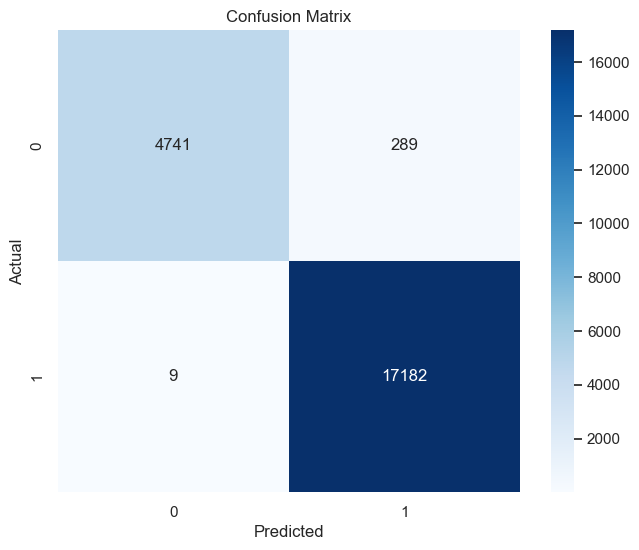

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a classifier (e.g., Random Forest Classifier)
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7825030376670717

Confusion Matrix:
 [[ 1342  3688]
 [ 1145 16046]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.27      0.36      5030
           1       0.81      0.93      0.87     17191

    accuracy                           0.78     22221
   macro avg       0.68      0.60      0.61     22221
weighted avg       0.75      0.78      0.75     22221



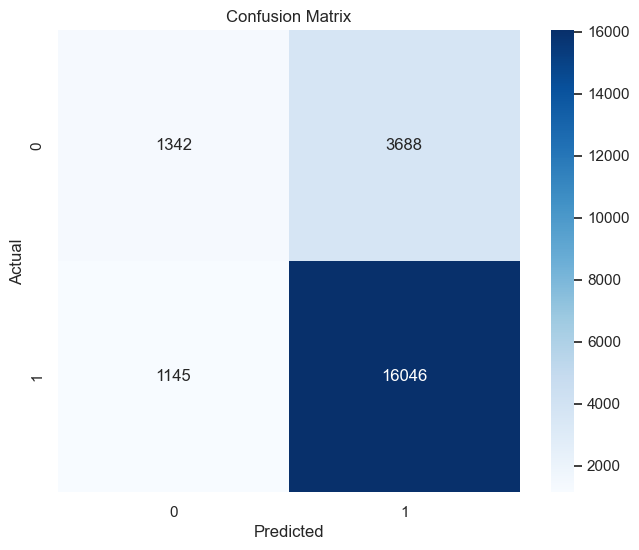

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a classifier (e.g., Random Forest Classifier)
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
df.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term_Long Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,12232,7280.0,10,46643.0,0.771811,777.39,18.0,10.000000,12,0,6762,7946,0.0,0.0,0,0,0,0,0,1
1,25014,7330.0,1,81099.0,0.771811,892.09,26.7,34.902403,14,0,35706,77961,0.0,0.0,0,1,0,1,0,0
2,16117,7240.0,9,60438.0,0.800861,1244.02,16.7,32.000000,11,1,11275,14815,1.0,0.0,0,0,0,1,0,0
3,11716,7400.0,3,34171.0,0.771811,990.94,10.0,34.902403,21,0,7009,43533,0.0,0.0,0,0,0,0,0,1
4,9789,6860.0,1,47003.0,0.800861,503.71,16.7,25.000000,13,1,16913,19553,1.0,0.0,0,1,0,1,0,0


In [70]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Sample data
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

y = np.array([0, 1, 0])

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i + 1}: {importance:.4f}")


Feature 1: 0.0000
Feature 2: 0.2500
Feature 3: 0.7500


In [162]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assume you have a dataset X_train and corresponding labels y_train
# Replace this with your own data

# Create and train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame)
feature_names = X_train.columns  # Replace with your actual feature names

# Create a dictionary to store feature importance scores with corresponding feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Purpose: 0.9773186038627775
Credit Score: 0.022681396137222597
Current Loan Amount: 0.0
Years in current job: 0.0
Annual Income: 0.0
Monthly Debt: 0.0
Years of Credit History: 0.0
Months since last delinquent: 0.0
Number of Open Accounts: 0.0
Number of Credit Problems: 0.0
Current Credit Balance: 0.0
Maximum Open Credit: 0.0
Bankruptcies: 0.0
Tax Liens: 0.0
Term_Long Term: 0.0
Home Ownership_HaveMortgage: 0.0
Home Ownership_Home Mortgage: 0.0
Home Ownership_Own Home: 0.0
Home Ownership_Rent: 0.0


In [168]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load a sample dataset (you can replace this with your own dataset)


# Create a pandas DataFrame using X
df = pd.DataFrame(data=X)

# Select the number of top features you want to keep
k = 2

# Create an instance of SelectKBest with the chi-squared test
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector to your data and transform it
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features (use column names of the DataFrame)
selected_feature_names = df.columns[selected_indices]

# Print the selected feature names
print(f"Selected features: {', '.join(map(str, selected_feature_names))}")


Selected features: Current Loan Amount, Credit Score


In [217]:
df2=df[['Current Loan Amount','Credit Score','Loan Status']]

In [50]:
# New Try Begings Here

In [52]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status',
       'Term_Long Term', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent'],
      dtype='object')

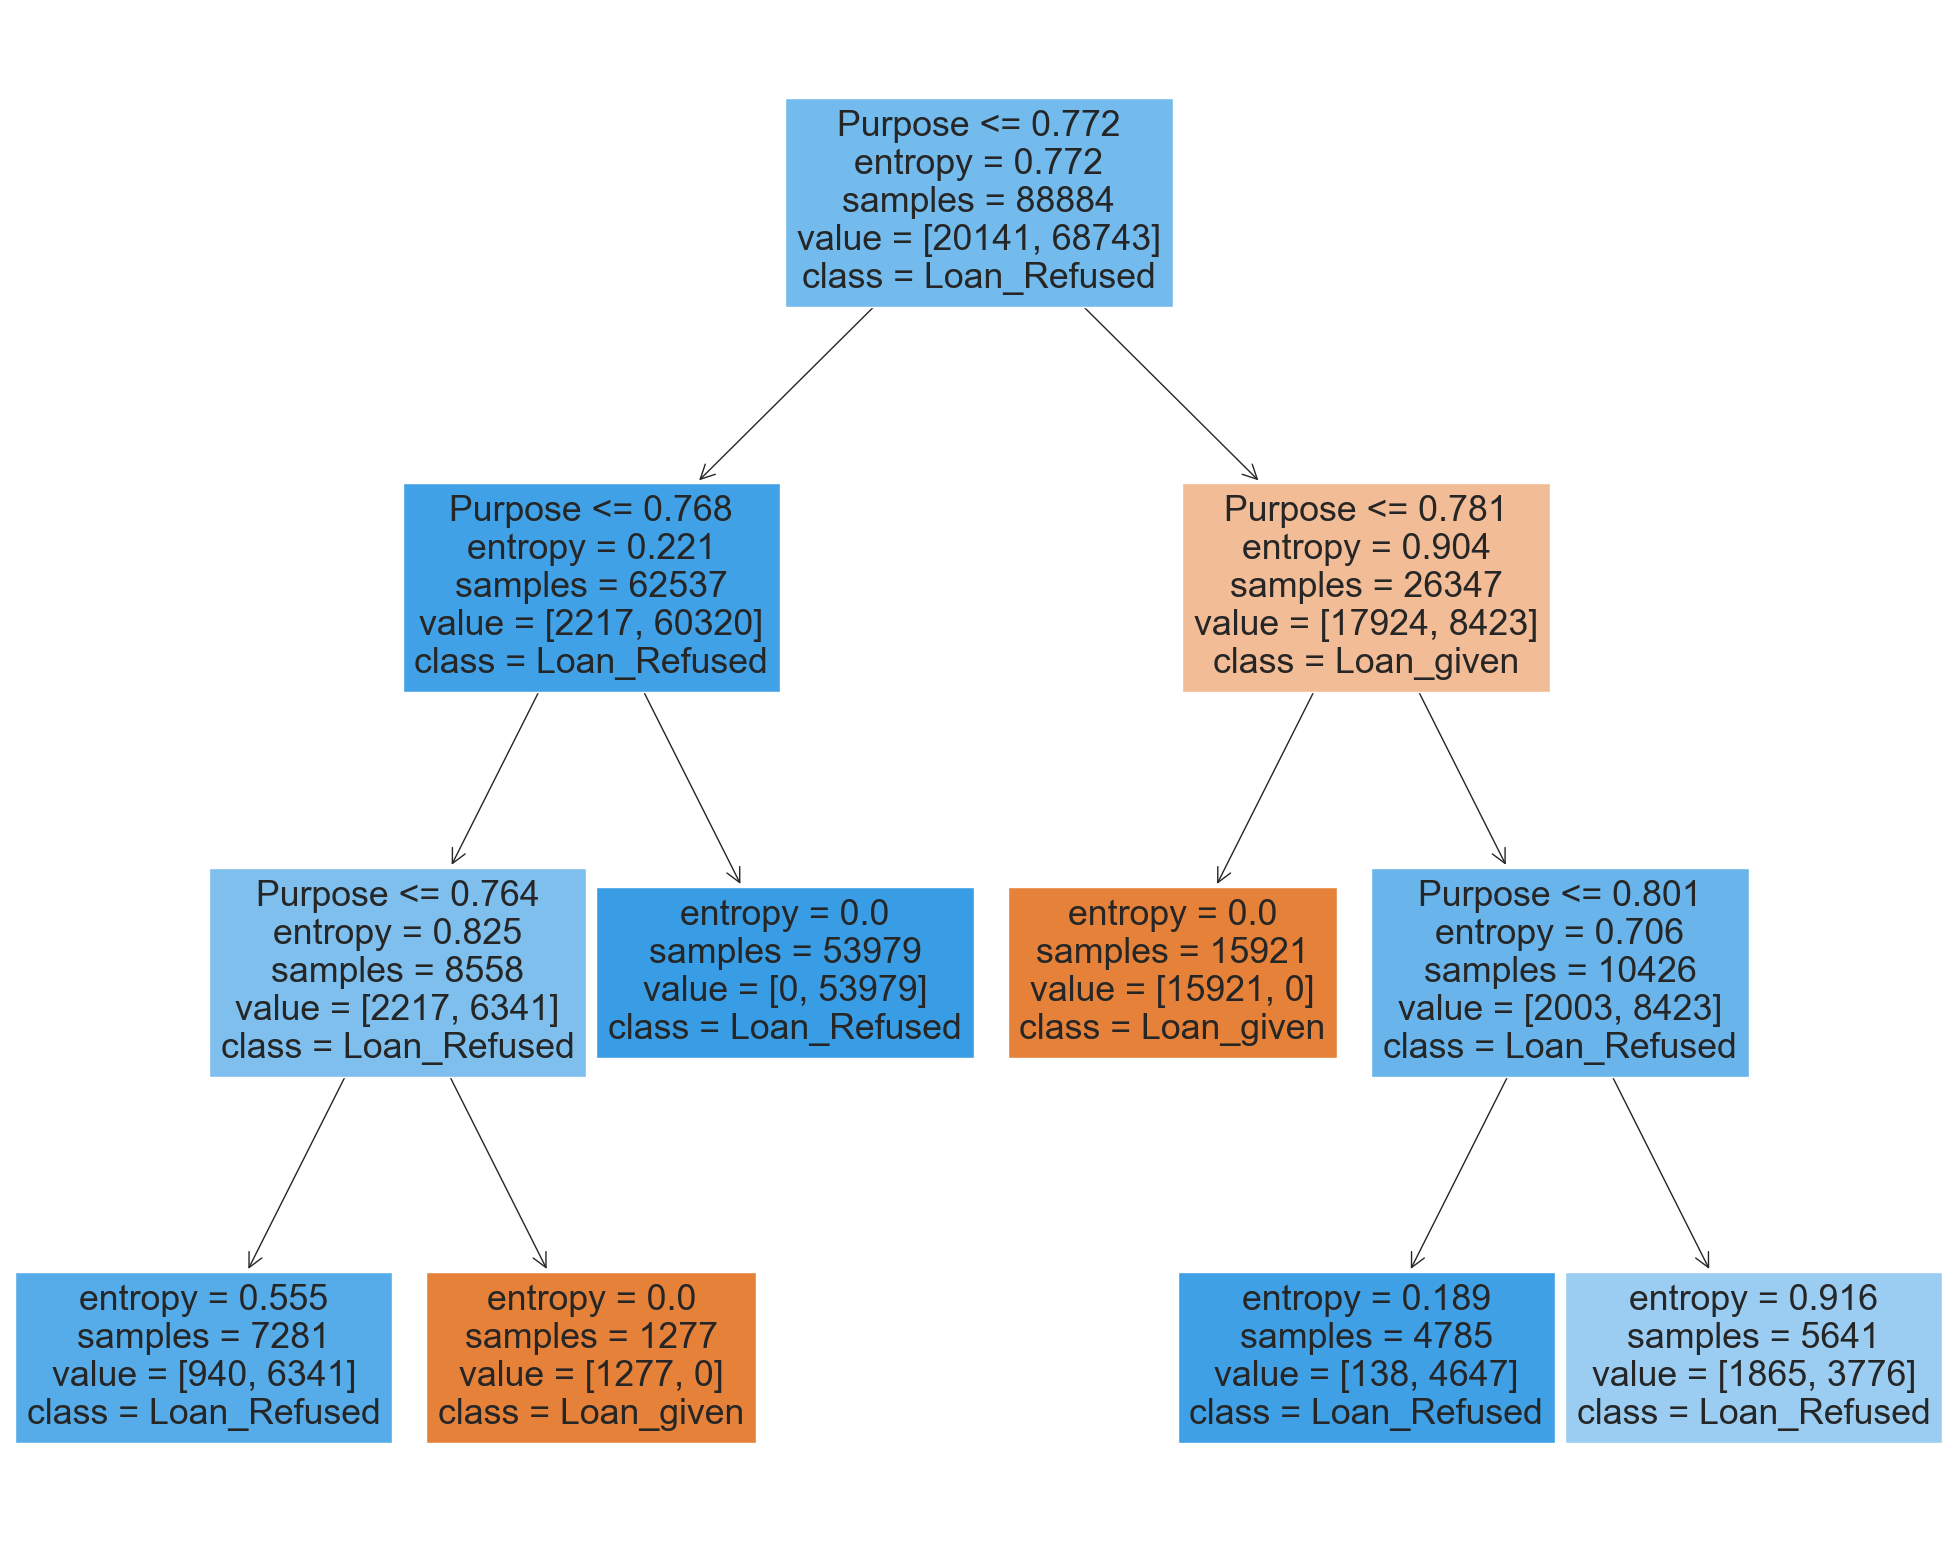

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define your decision tree classifier with the 'entropy' criterion
df_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Fit the classifier to your training data
df_clf = df_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = df_clf.predict(X_test)

# Define your feature names and class names
feature_names = ['Current Loan Amount', 'Credit Score', 'Years in the current job',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Term_Long Term', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent']

class_names = ['Loan_given', 'Loan_Refused']

# Create a figure to display the tree
fig = plt.figure(figsize=(25, 20))

# Plot the decision tree
plot = tree.plot_tree(df_clf, feature_names=feature_names, class_names=class_names, filled=True)
